<a href="https://colab.research.google.com/github/dreamingv-oid/CS290/blob/main/k_means_clustering_algoritm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Running K-Means with k=2


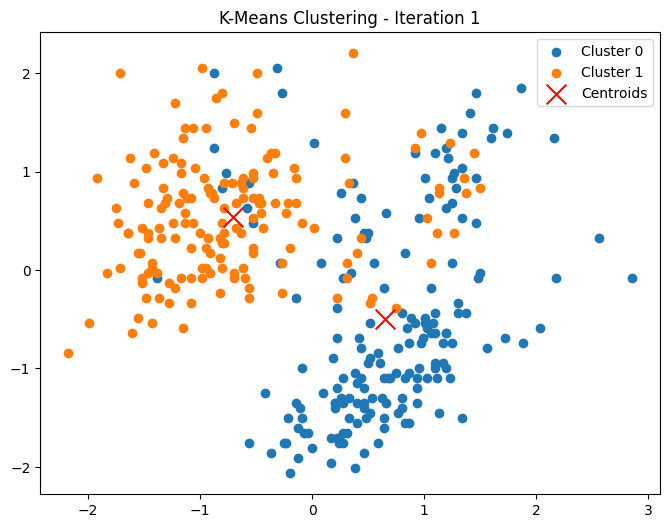

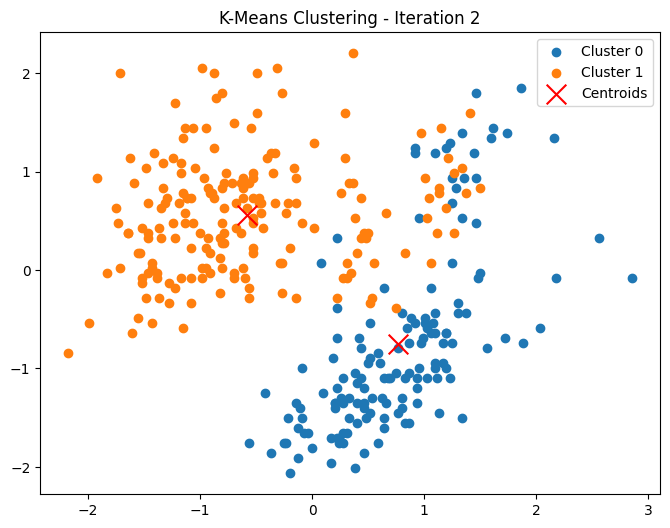

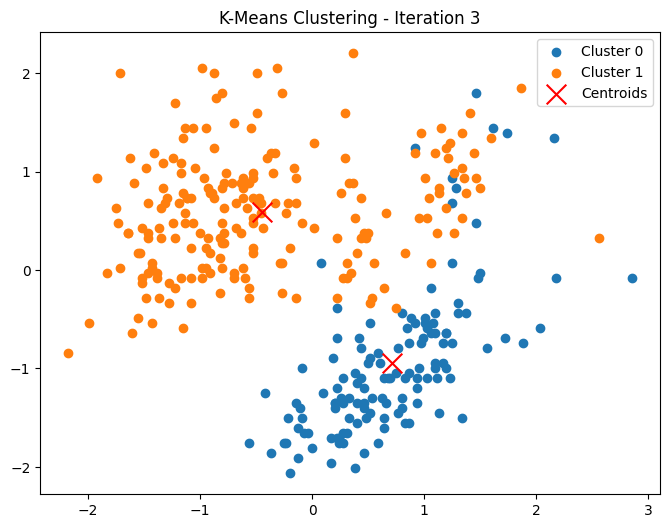

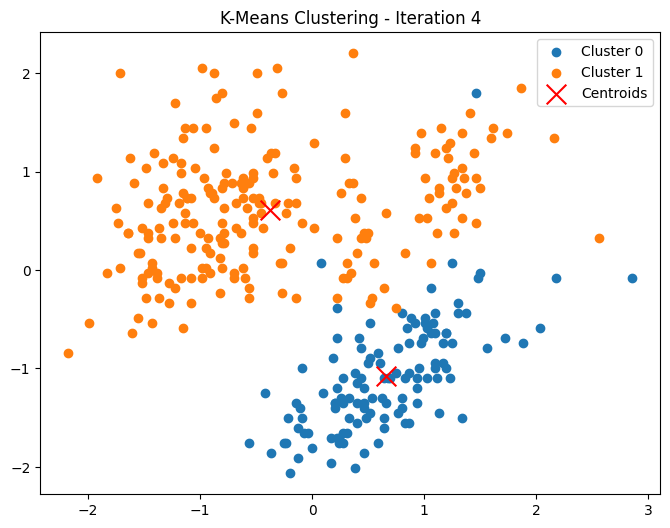

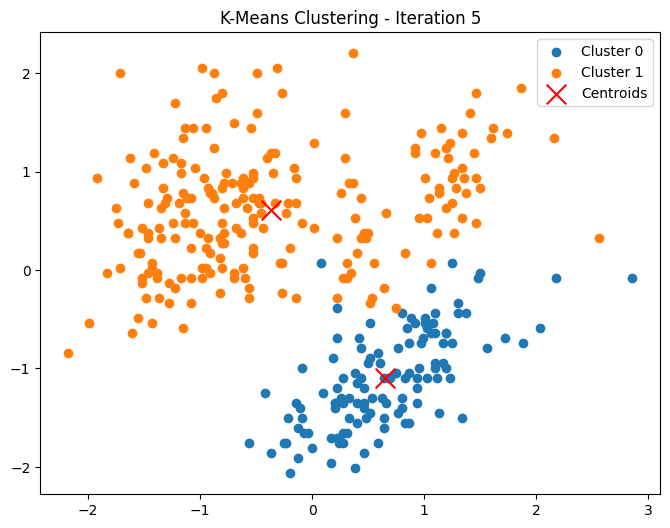

Inertia for k=2: 1109.07
Running K-Means with k=3


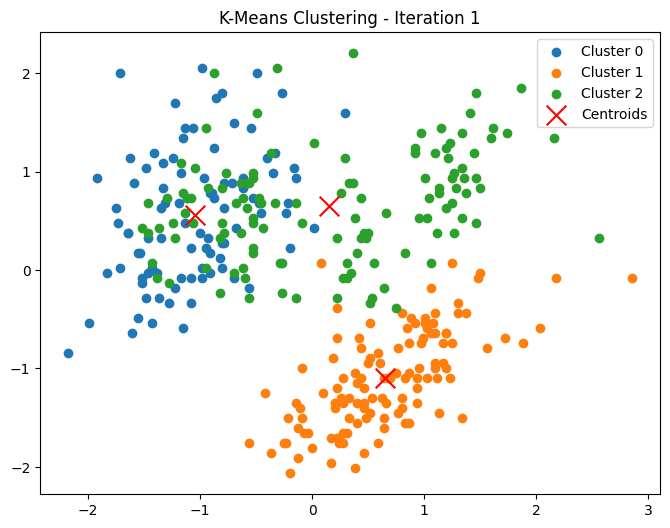

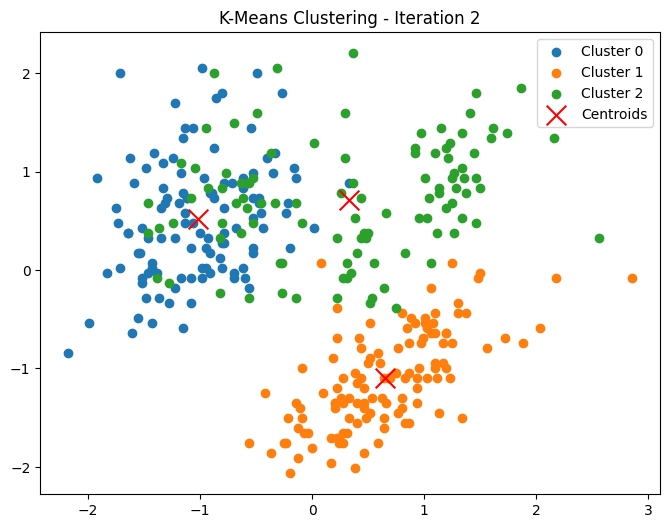

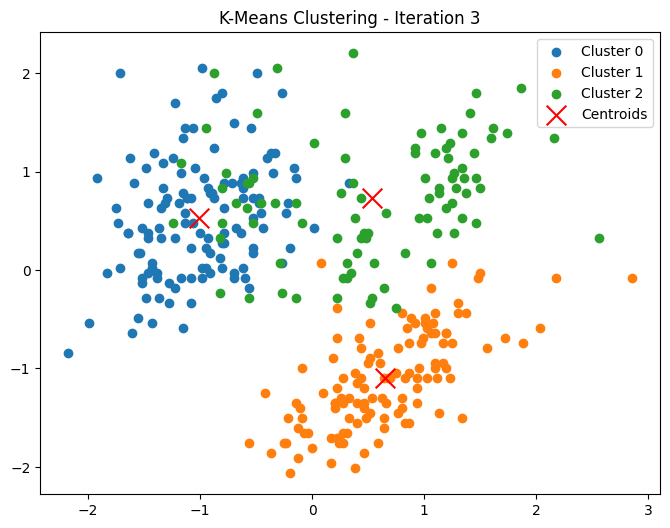

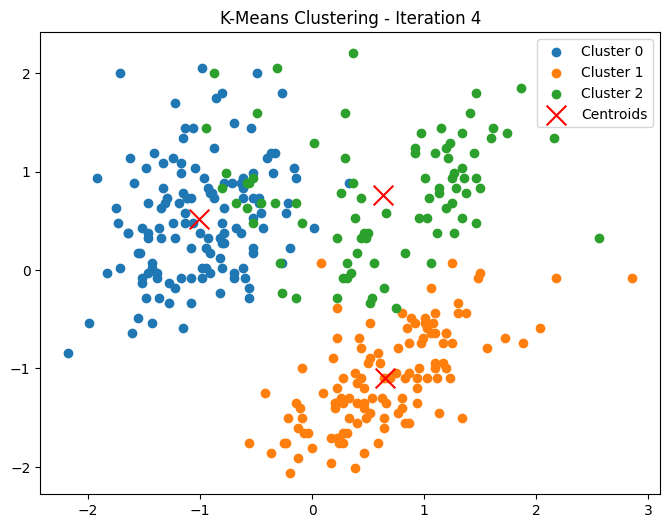

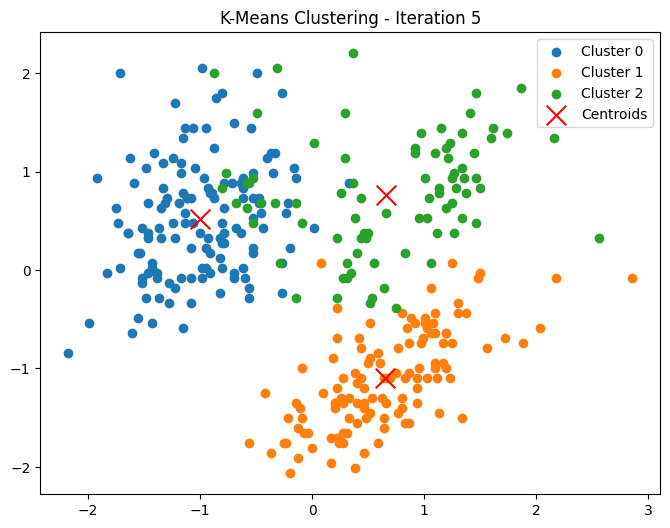

Inertia for k=3: 898.23
Running K-Means with k=4


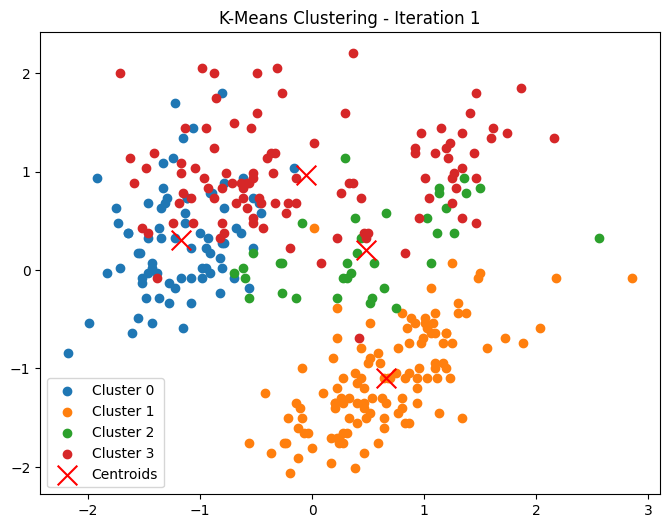

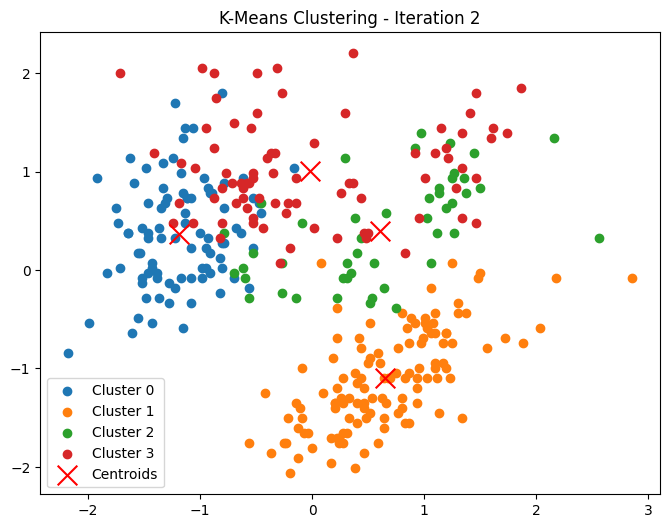

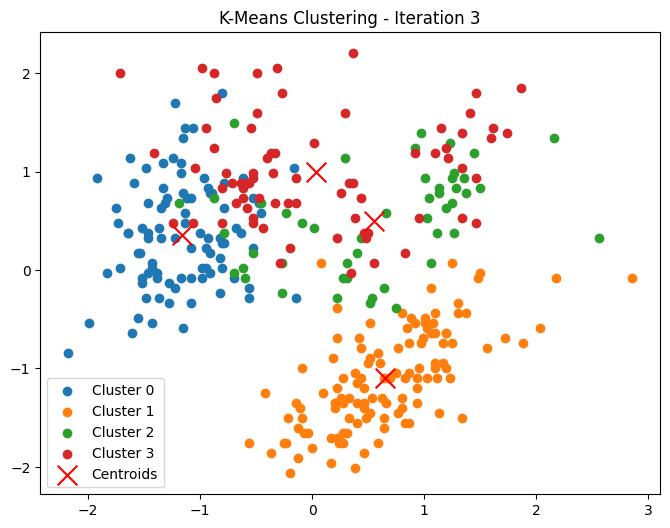

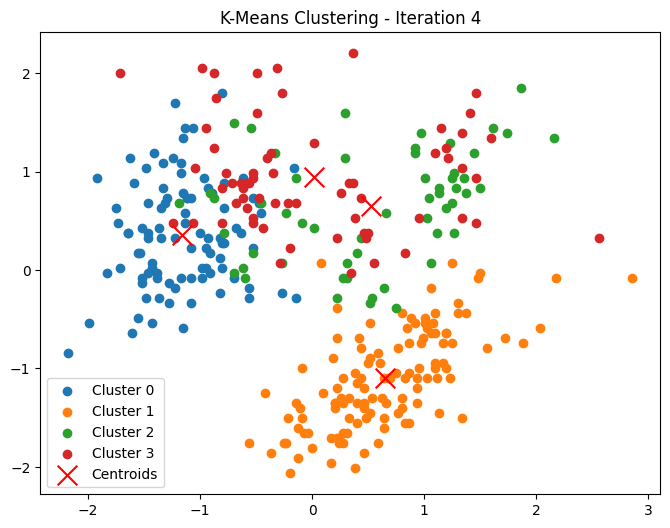

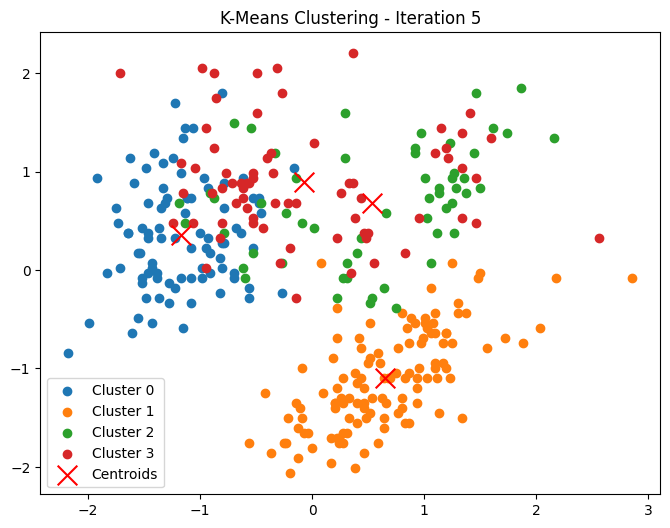

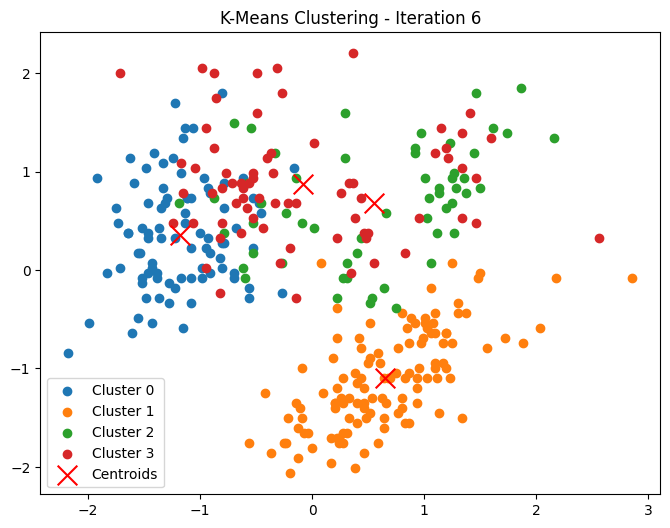

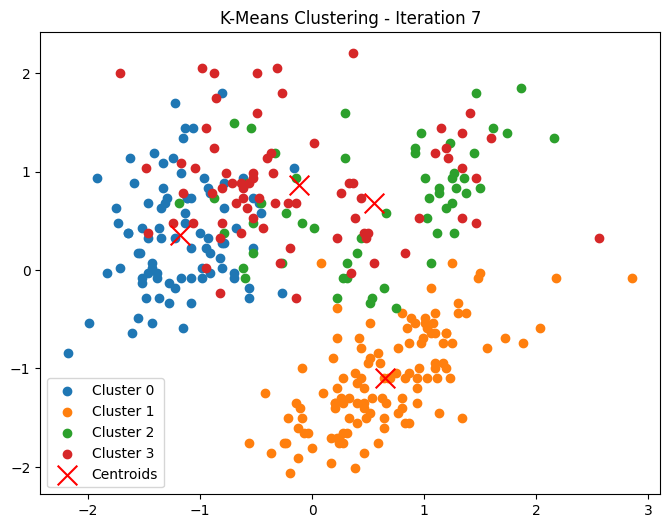

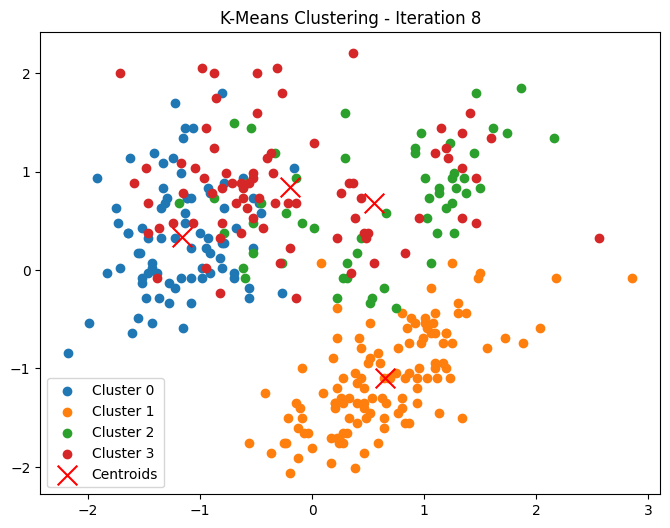

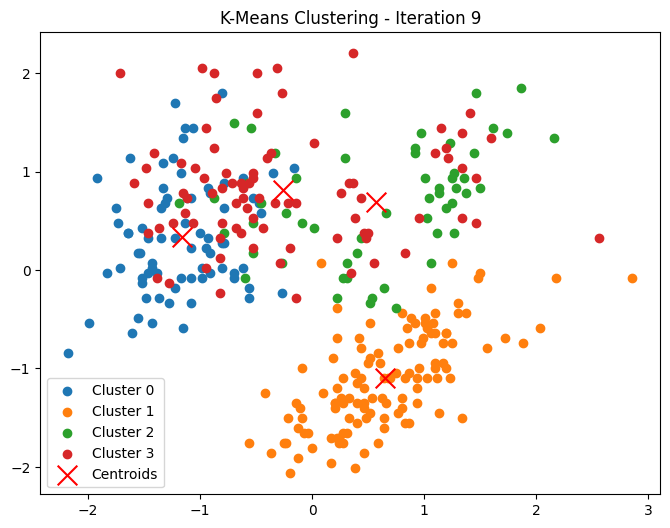

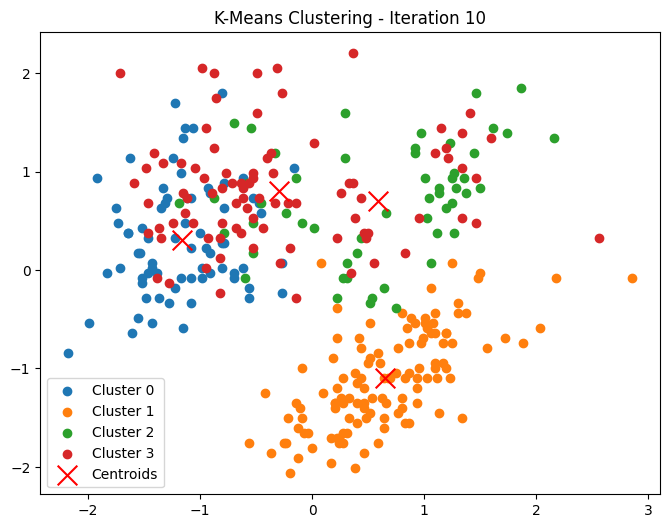

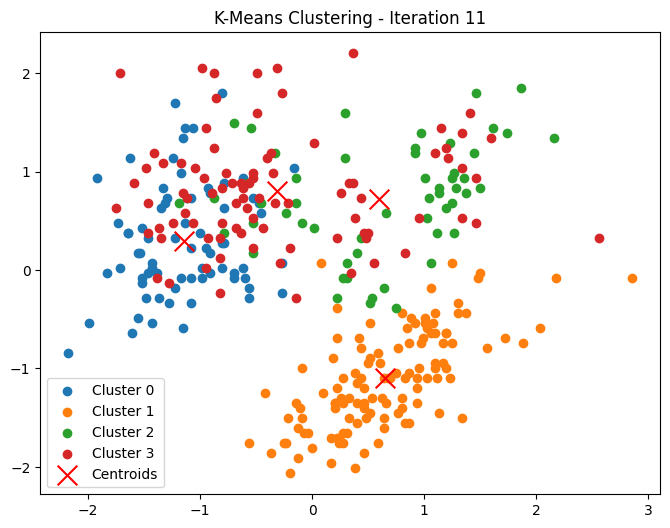

Inertia for k=4: 792.34


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load and preprocess the penguins dataset
penguins = pd.read_csv("https://github.com/mbrudd/csci290/raw/refs/heads/main/data/penguins.csv")
penguins.columns = penguins.columns.str.strip()
penguins.dropna(inplace=True)

# Encode categorical features manually
categorical_cols = ['island', 'sex', 'species']
penguins_encoded = penguins.copy()
label_encoders = {}

for col in categorical_cols:
    unique_vals = penguins[col].unique()
    label_encoders[col] = {val: i for i, val in enumerate(unique_vals)}
    penguins_encoded[col] = penguins[col].map(label_encoders[col])

# Standardize numerical features manually
numerical_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year']
penguins_encoded[numerical_cols] = (penguins_encoded[numerical_cols] - penguins_encoded[numerical_cols].mean()) / penguins_encoded[numerical_cols].std()

# Define the K-Means Clustering Algorithm
class KMeansClustering:
    def __init__(self, k, init_method='random', max_iter=100, tolerance=1e-4):
        self.k = k
        self.init_method = init_method
        self.max_iter = max_iter
        self.tolerance = tolerance
        self.centroids = None

    def initialize_centroids(self, X):
        if self.init_method == 'random':
            indices = np.random.choice(range(len(X)), self.k, replace=False)
            return X[indices]
        elif self.init_method == 'k-means++':
            centroids = [X[np.random.choice(range(len(X)))]]
            for _ in range(1, self.k):
                distances = np.min([np.linalg.norm(X - c, axis=1) for c in centroids], axis=0)
                probabilities = distances / distances.sum()
                centroids.append(X[np.random.choice(range(len(X)), p=probabilities)])
            return np.array(centroids)

    def fit(self, X):
        X = np.array(X)
        self.centroids = self.initialize_centroids(X)
        for iteration in range(self.max_iter):
            # Assign points to the nearest cluster
            distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids]).T
            clusters = np.argmin(distances, axis=1)

            # Update centroids
            new_centroids = np.array([X[clusters == i].mean(axis=0) for i in range(self.k)])
            if np.linalg.norm(new_centroids - self.centroids) < self.tolerance:
                break
            self.centroids = new_centroids

            # Visualize clusters and centroids
            self.plot_clusters(X, clusters, iteration)

        # Final inertia calculation
        inertia = np.sum([np.linalg.norm(X[i] - self.centroids[clusters[i]])**2 for i in range(len(X))])
        return clusters, inertia

    def plot_clusters(self, X, clusters, iteration):
        plt.figure(figsize=(8, 6))
        for i in range(self.k):
            plt.scatter(X[clusters == i, 0], X[clusters == i, 1], label=f"Cluster {i}")
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], color='red', marker='x', s=200, label='Centroids')
        plt.title(f"K-Means Clustering - Iteration {iteration + 1}")
        plt.legend()
        plt.show()

# Prepare data
X = penguins_encoded[numerical_cols + ['island', 'sex']].values

# Run K-Means Clustering
for k in [2, 3, 4]:  # Experiment with different values of k
    print(f"Running K-Means with k={k}")
    kmeans = KMeansClustering(k=k, init_method='k-means++')
    clusters, inertia = kmeans.fit(X)
    print(f"Inertia for k={k}: {inertia:.2f}")
